# Problem Statement

This notebook focuses on advanced analytics including ratings distribution, cuisine combinations, geographic clustering, and restaurant chain performance.

# Dataset Overview

### Loading the Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("D:\Cognifyz_Data_Analysis_Internship\data\Dataset .csv")
df.head(10)



<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Akash\AppData\Local\Temp\ipykernel_15908\1349765084.py:4: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("D:\Cognifyz_Data_Analysis_Internship\data\Dataset .csv")


Restaurant ID                           Restaurant Name  Country Code  \
0        6317637                          Le Petit Souffle           162   
1        6304287                          Izakaya Kikufuji           162   
2        6300002                    Heat - Edsa Shangri-La           162   
3        6318506                                      Ooma           162   
4        6314302                               Sambo Kojin           162   
5       18189371                              Din Tai Fung           162   
6        6300781                                Buffet 101           162   
7        6301290                                   Vikings           162   
8        6300010  Spiral - Sofitel Philippine Plaza Manila           162   
9        6314987                                  Locavore           162   

               City                                            Address  \
0       Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1       Makati City  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Mandaluyong City  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Mandaluyong City  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Mandaluyong City  Third Floor, Mega Atrium, SM Megamall, Ortigas...   
5  Mandaluyong City  Ground Floor, Mega Fashion Hall, SM Megamall, ...   
6        Pasay City  Building K, SM By The Bay, Sunset Boulevard, M...   
7        Pasay City  Building B, By The Bay, Seaside Boulevard, Mal...   
8        Pasay City  Plaza Level, Sofitel Philippine Plaza Manila, ...   
9        Pasig City  Brixton Technology Center, 10 Brixton Street, ...   

                                          Locality  \
0        Century City Mall, Poblacion, Makati City   
1       Little Tokyo, Legaspi Village, Makati City   
2       Edsa Shangri-La, Ortigas, Mandaluyong City   
3           SM Megamall, Ortigas, Mandaluyong City   
4           SM Megamall, Ortigas, Mandaluyong City   
5           SM Megamall, Ortigas, Mandaluyong City   
6  SM by the Bay, Mall of Asia Complex, Pasay City   
7  SM by the Bay, Mall of Asia Complex, Pasay City   
8      Sofitel Philippine Plaza Manila, Pasay City   
9                                        Kapitolyo   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   
5  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056314  14.583764   
6  SM by the Bay, Mall of Asia Complex, Pasay Cit...  120.979667  14.531333   
7  SM by the Bay, Mall of Asia Complex, Pasay Cit...  120.979333  14.540000   
8  Sofitel Philippine Plaza Manila, Pasay City, P...  120.980090  14.552990   
9                              Kapitolyo, Pasig City  121.056532  14.572041   

                             Cuisines  ...          Currency  \
0          French, Japanese, Desserts  ...  Botswana Pula(P)   
1                            Japanese  ...  Botswana Pula(P)   
2    Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3                     Japanese, Sushi  ...  Botswana Pula(P)   
4                    Japanese, Korean  ...  Botswana Pula(P)   
5                             Chinese  ...  Botswana Pula(P)   
6                     Asian, European  ...  Botswana Pula(P)   
7  Seafood, Filipino, Asian, European  ...  Botswana Pula(P)   
8             European, Asian, Indian  ...  Botswana Pula(P)   
9                            Filipino  ...  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No  

### Shape of Dataset

In [3]:
df.shape


(9551, 21)

### Column Names & Data Types

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Missing Values Check

In [5]:
df.isnull().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Statistical Summary

In [6]:
df.describe()


Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

# Data Cleaning

### Check Missing Values

In [7]:
df.isnull().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Remove Rows with Critical Missing Values

In [8]:
df = df.dropna(subset=['City', 'Cuisines', 'Aggregate rating'])


### Handle Data Types

In [9]:
df['Aggregate rating'] = df['Aggregate rating'].astype(float)
df['Price range'] = df['Price range'].astype(int)


### Remove Duplicate Records

In [10]:
df.duplicated().sum()
df = df.drop_duplicates()


### Final Clean Dataset Check

In [11]:
df.info()
df.isnull().sum()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

# TASK-1: Restaurant Ratings Analysis

### Question: 1 Analyze the distribution of aggregate ratings and determine the most common rating range.

In [12]:
# Distribution of ratings
rating_distribution = df['Aggregate rating'].value_counts().sort_index()

rating_distribution

Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     495
3.5     480
3.6     458
3.7     427
3.8     399
3.9     332
4.0     266
4.1     274
4.2     221
4.3     174
4.4     143
4.5      95
4.6      78
4.7      41
4.8      25
4.9      61
Name: count, dtype: int64

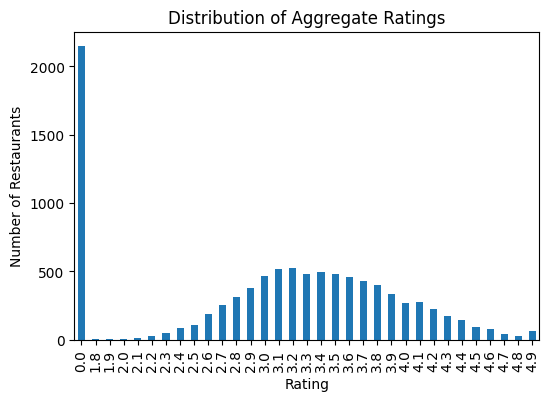

In [13]:
plt.figure(figsize=(6,4))
rating_distribution.plot(kind='bar')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()

In [14]:
most_common_rating = rating_distribution.idxmax()
most_common_rating

np.float64(0.0)

### Question: 2 Calculate the average number of votes received by restaurants.

In [15]:
average_votes = df['Votes'].mean()
average_votes

np.float64(156.7720603647034)

**Insight:**  
Most restaurants fall into mid-range ratings, while high ratings are harder to
achieve and often backed by strong customer trust.

# TASK-2: Cuisine Combination Analysis

### Question: 1 Identify most common cuisine combinations

In [16]:
top_cuisine_combos = df['Cuisines'].dropna().value_counts().head(10)
top_cuisine_combos

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

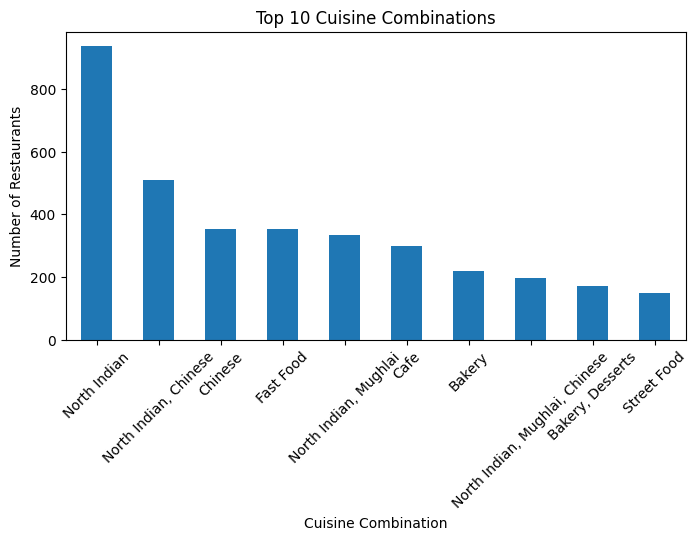

In [17]:
plt.figure(figsize=(8,4))
top_cuisine_combos.plot(kind='bar')
plt.title('Top 10 Cuisine Combinations')
plt.xlabel('Cuisine Combination')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

### Question:2 Determine if certain cuisine combinations tend to have higher ratings

In [18]:
combo_avg_rating = (
    df.groupby('Cuisines')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
combo_avg_rating

Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Italian, Bakery, Continental       4.9
BBQ, Breakfast, Southern           4.9
European, German                   4.9
Hawaiian, Seafood                  4.9
Sunda, Indonesian                  4.9
Name: Aggregate rating, dtype: float64

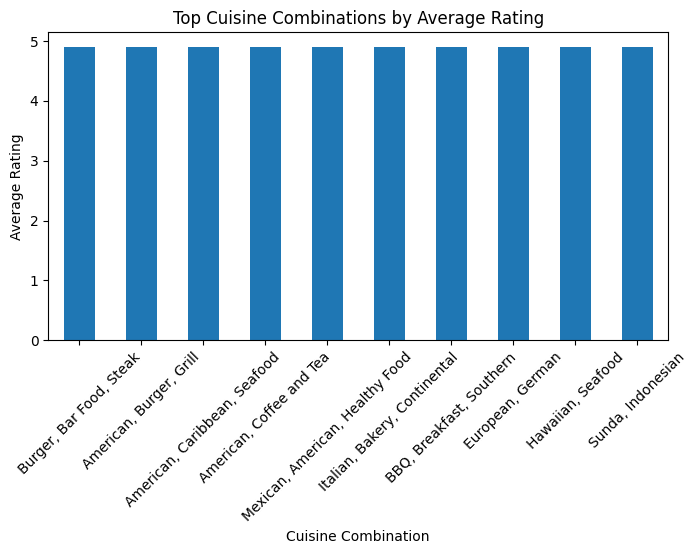

In [19]:
plt.figure(figsize=(8,4))
combo_avg_rating.plot(kind='bar')
plt.title('Top Cuisine Combinations by Average Rating')
plt.xlabel('Cuisine Combination')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

**Insight:**  
Balanced and popular cuisine combinations tend to receive higher customer ratings.

# TASK-3: Geographic Analysis

### Question: 1 Plot the locations of restaurants on a map using longitude and latitude coordinates.

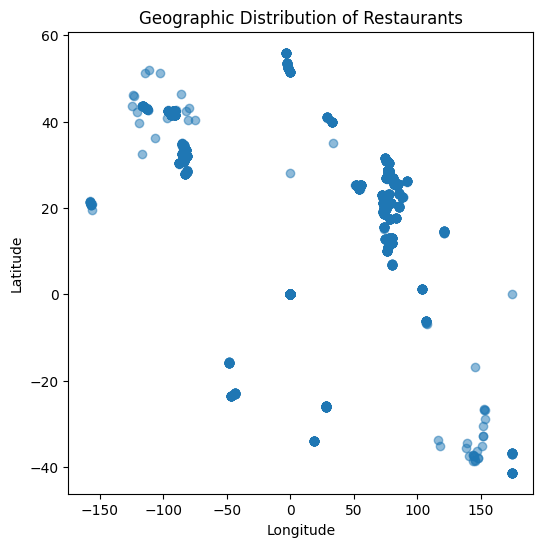

In [21]:
plt.figure(figsize=(6,6))

plt.scatter(
    df['Longitude'],
    df['Latitude'],
    alpha=0.5
)

plt.title('Geographic Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Question: 2 Identify any patterns or clusters ofrestaurants in specific areas.


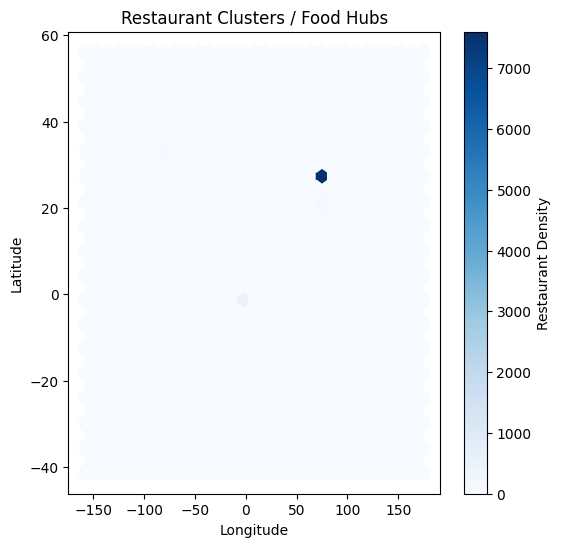

In [22]:
plt.figure(figsize=(6,6))

plt.hexbin(
    df['Longitude'],
    df['Latitude'],
    gridsize=30,
    cmap='Blues'
)

plt.colorbar(label='Restaurant Density')
plt.title('Restaurant Clusters / Food Hubs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

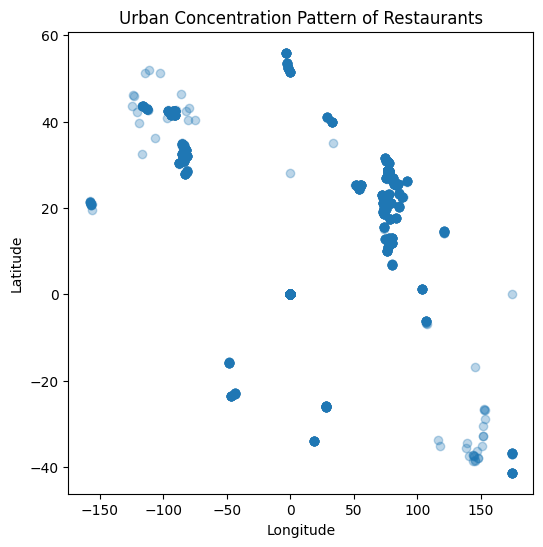

In [23]:
plt.figure(figsize=(6,6))

plt.scatter(
    df['Longitude'],
    df['Latitude'],
    alpha=0.3
)

plt.title('Urban Concentration Pattern of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Insight:**  
Restaurants are concentrated in urban clusters, indicating high-demand food hubs.

# TASK-4: Restaurant Chains Analysis

### Question: 1 Identify if there are any restaurant chains present in the dataset

In [30]:
restaurant_count = df['Restaurant Name'].value_counts()
restaurant_chains = restaurant_count[restaurant_count > 1]
restaurant_chains.head()

Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: count, dtype: int64

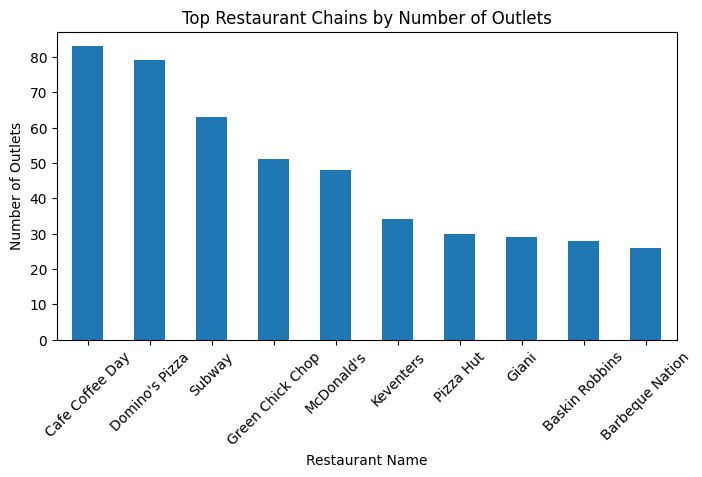

In [31]:
plt.figure(figsize=(8,4))

restaurant_chains.head(10).plot(kind='bar')

plt.title('Top Restaurant Chains by Number of Outlets')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Outlets')
plt.xticks(rotation=45)

plt.show()

### Question : 2 Analyze the ratings and popularity of different restaurant chains

In [25]:
# Average rating for each restaurant chain
chain_avg_rating = (
    df.groupby('Restaurant Name')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

chain_avg_rating

Restaurant Name
Braseiro da G��vea               4.9
The Great Indian Pub             4.9
Miann                            4.9
Carnival By Tresind              4.9
Caterspoint                      4.9
Mazzaro's Italian Market         4.9
CakeBee                          4.9
Masala Library                   4.9
McGuire's Irish Pub & Brewery    4.9
Marukame Udon                    4.9
Name: Aggregate rating, dtype: float64

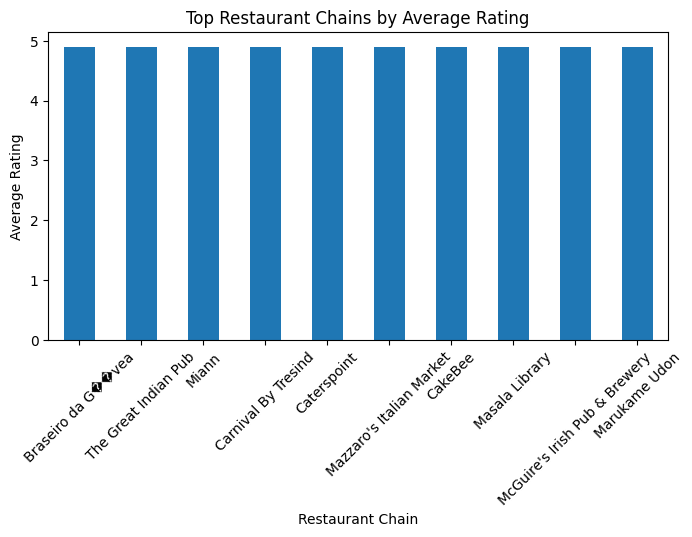

In [26]:
plt.figure(figsize=(8,4))

chain_avg_rating.plot(kind='bar')

plt.title('Top Restaurant Chains by Average Rating')
plt.xlabel('Restaurant Chain')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

plt.show()

In [27]:
# Average votes per restaurant chain
chain_avg_votes = (
    df.groupby('Restaurant Name')['Votes']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

chain_avg_votes

Restaurant Name
Toit                10934.0
Hauz Khas Social     7931.0
Peter Cat            7574.0
Big Brewsky          5705.0
The Black Pearl      5385.0
BarBQ                5288.0
Warehouse Cafe       4914.0
Truffles             4841.0
Mocambo              4464.0
Gulati               4373.0
Name: Votes, dtype: float64

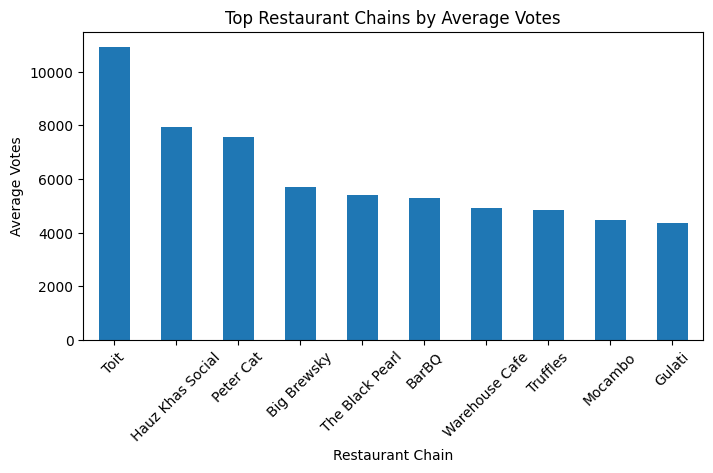

In [28]:
plt.figure(figsize=(8,4))

chain_avg_votes.plot(kind='bar')

plt.title('Top Restaurant Chains by Average Votes')
plt.xlabel('Restaurant Chain')
plt.ylabel('Average Votes')
plt.xticks(rotation=45)

plt.show()

**Insight:**  
Successful restaurant chains maintain consistent quality and stronger customer
engagement across locations.